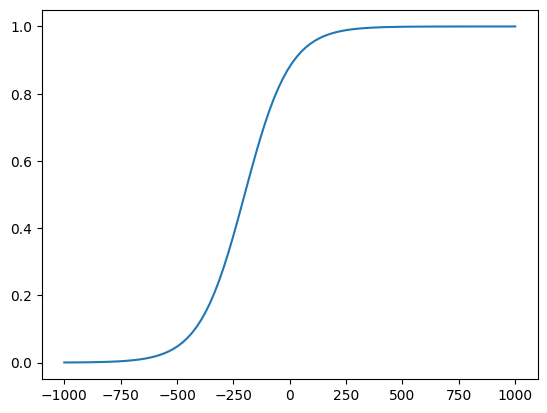

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

def logistic(a, b, x):
    return 1 / (1 + np.exp(-(a + b * x)))

a = 2
b = 0.01
x = np.linspace(-1000, 1000, 100)

plt.plot(x, logistic(a, b, x))

In [2]:
url_data = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/default_islp.csv"
default = pd.read_csv(url_data)
default.head()

,Unnamed: 0,default,student,balance,income
0,0,No,No,729.526495,44361.625074
1,1,No,Yes,817.180407,12106.134700
2,2,No,No,1073.549164,31767.138947
3,3,No,No,529.250605,35704.493935
4,4,No,No,785.655883,38463.495879


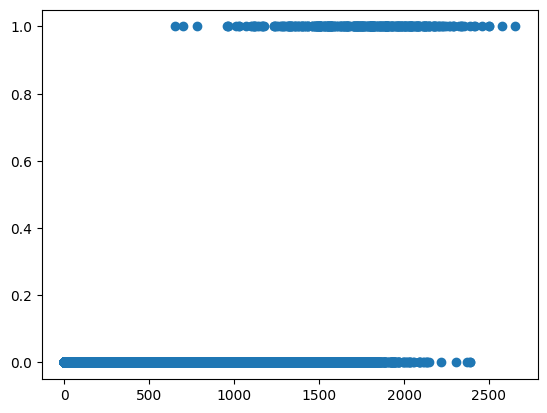

In [3]:
default['default_bin'] = [0 if de_x == "No" else 1 for de_x in default['default']]

plt.scatter(
    default['balance'],
    default['default_bin']
)

In [4]:
# default_bin ~ balance

In [5]:
model1 = sm.OLS.from_formula('default_bin ~ balance', data=default)
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            default_bin   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          2.77e-286
Time:                        19:35:17   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0752      0.003    -22.416      0.000      -0.082      -0.069
balance        0.0001   3.47e-06     37.374      0.000       0.000       0.000
==============================================================================
Omnibus:                     8547.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180810.806
Skew:                           4.243   Prob(JB):                         0.00
Kurtosis:                      22.025   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

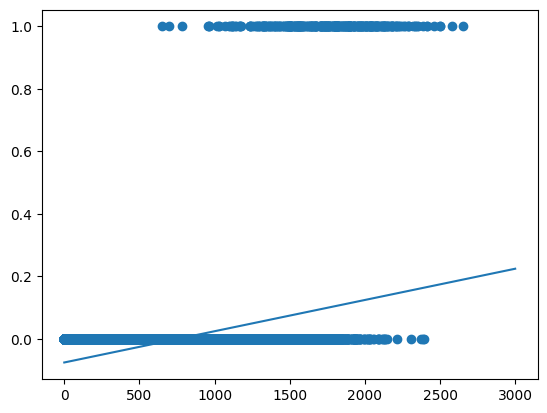

In [6]:
plt.scatter(
    default['balance'],
    default['default_bin']
)
x = np.linspace(0, 3000, 100)
predicted = -0.0752 + 0.0001 * x
plt.plot(x, predicted)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

default = pd.read_csv(url_data)
default.head()

,Unnamed: 0,default,student,balance,income
0,0,No,No,729.526495,44361.625074
1,1,No,Yes,817.180407,12106.134700
2,2,No,No,1073.549164,31767.138947
3,3,No,No,529.250605,35704.493935
4,4,No,No,785.655883,38463.495879


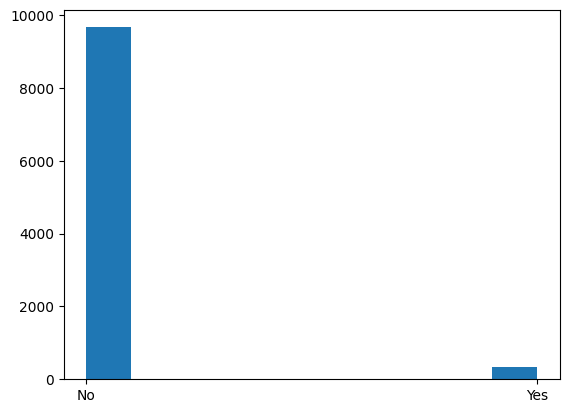

In [8]:
plt.hist(default['default']);

In [9]:
default['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [10]:
# cambiar No a 0, Yes a 1.
default['default'] = [0 if de_x == "No" else 1 for de_x in default['default']]

X = default[['balance']]
y = default['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # etiquetas
y_pred_proba = model.predict_proba(X_test)[:, 1] # probabilidad


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'PRecision : {accuracy:.2f}') # primeros dos decimales de accuracy


PRecision : 0.97


Text(50.72222222222221, 0.5, 'True')

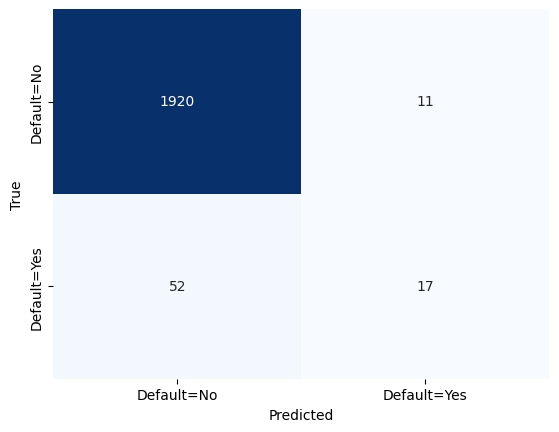

In [12]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix,
            annot=True,
            fmt="d", # valores enteros
            cmap="Blues",
            cbar=False,
            xticklabels=["Default=No", "Default=Yes"],
            yticklabels=["Default=No", "Default=Yes"]
           )
plt.xlabel("Predicted")
plt.ylabel("True")

In [13]:
TN, FP, FN, TP = conf_matrix.ravel()

In [14]:
sensibilidad = TP/(FN+TP)
especificidad = TN / (TN + FP)
print(
    f'Sensibilidad: {sensibilidad:.2f}, Especificidad: {especificidad:.2f}'
) # SMOTE: synthetic minority over-sampling

Sensibilidad: 0.25, Especificidad: 0.99


In [15]:
default['default'].value_counts()

default
0    9667
1     333
Name: count, dtype: int64

In [16]:
from sklearn.utils import resample
# filtrar clases
majority = default[default['default'] == 0] # No
minority = default[default['default'] == 1] # Yes

majority_downsampled = resample(
    majority,
    replace=False,
    # cuantas muestras quiero de majority
    n_samples=len(minority), # len(minority)
    random_state=42
)
print(f"Size of minority: {len(minority)}")
print(f"Size of majority: {len(majority)}")
print(f"Size of majority_downsampled: {len(majority_downsampled)}")

Size of minority: 333
Size of majority: 9667
Size of majority_downsampled: 333


In [17]:
default_balanced = pd.concat([minority, majority_downsampled])
default_balanced['default'].value_counts()

default
1    333
0    333
Name: count, dtype: int64

In [18]:
default.shape

(10000, 5)

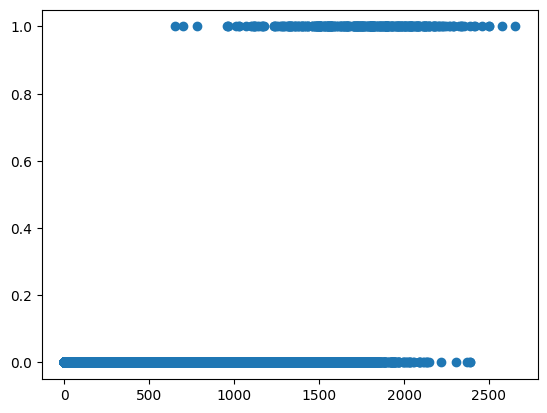

In [19]:
plt.scatter(
    default['balance'],
    default['default']
)

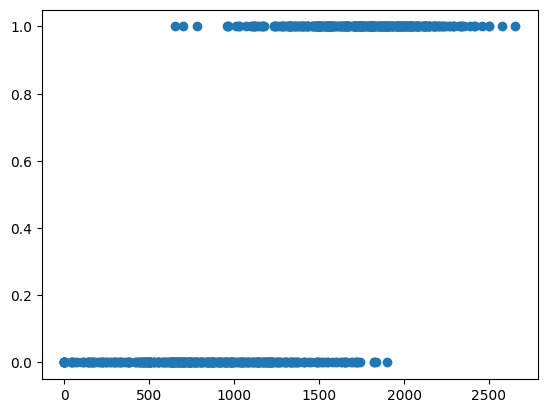

In [20]:
plt.scatter(
    default_balanced['balance'],
    default_balanced['default']
)

In [28]:
sensibilidad = TP/(FN+TP)
especificidad = TN / (TN + FP)
print(
    f'Sensibilidad: {sensibilidad:.2f}, Especificidad: {especificidad:.2f}'
) # SMOTE: synthetic minority over-sampling

Sensibilidad: 0.25, Especificidad: 0.99


In [22]:
X = default_balanced[['balance']]
y = default_balanced['default']

X_train, X_test, y_tain, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_tain)

y_pred = model.predict(X_test)

In [29]:
TN, FP, FN, TP = conf_matrix.ravel()
sensibilidad = TP / (FN + TP)
especificidad = TN / (TN + FP)
print(f'sensibilidad {sensibilidad}')
print(f'especificidad {especificidad}')

sensibilidad 0.8695652173913043
especificidad 0.871569135163128


Precisión: 0.87
F1-Score: 0.89


Text(50.72222222222221, 0.5, 'True')

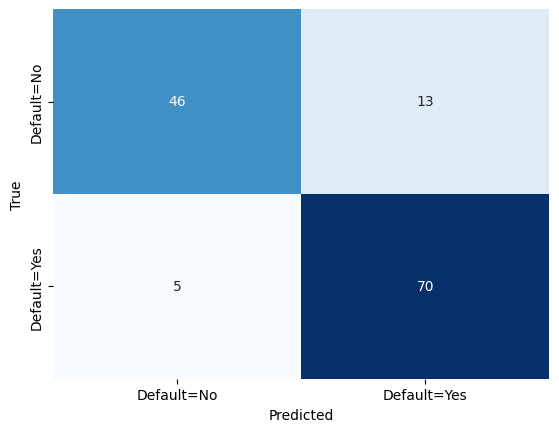

In [24]:
accuracy = accuracy_score(y_test, y_pred)
# y_pred se obtiene con X_test
f1 = f1_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d", # valores enteros
            cmap="Blues",
            cbar=False,
            xticklabels=["Default=No", "Default=Yes"],
            yticklabels=["Default=No", "Default=Yes"]
           )
plt.xlabel("Predicted")
plt.ylabel("True")

[array([835.37488561])]

In [44]:
x_new = np.linspace(0, 1500, 1000).reshape(-1, 1)
x_new.shape

(1000, 1)

/Users/jealcalat/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


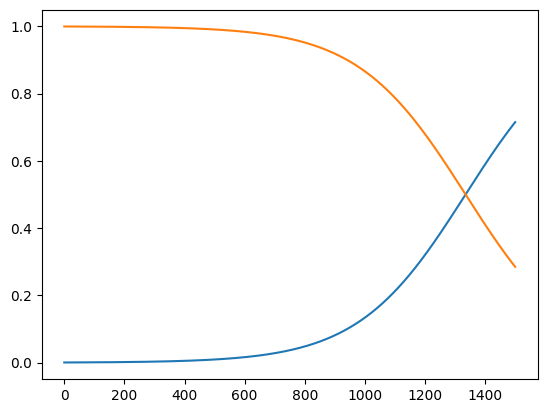

In [49]:
predicted = model.predict_proba(x_new)
predicted[:10]

plt.plot(x_new, predicted[:, 1], label="Default=Yes")
plt.plot(x_new, predicted[:, 0], label="Default=No")

In [25]:
accuracy = accuracy_score(y_test, y_pred)
# y_pred se obtiene con X_test
f1 = f1_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matriz de Confusión:")

Precisión: 0.87
F1-Score: 0.89
Matriz de Confusión:


In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Dividir en variables predictoras y variable respuesta sin balancear aún
X = default[['balance']]  # Incluye todas las variables predictoras deseadas
y = default['default']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística con los datos de entrenamiento balanceados
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)

Precisión: 0.87
F1-Score: 0.32
Matriz de Confusión:
[[1683  248]
 [   9   60]]


Text(50.72222222222221, 0.5, 'True')

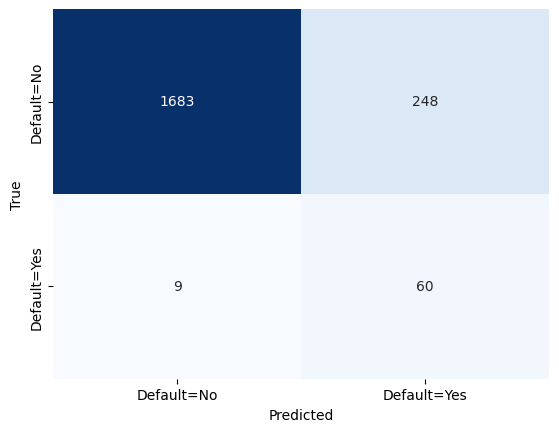

In [27]:
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d", # valores enteros
            cmap="Blues",
            cbar=False,
            xticklabels=["Default=No", "Default=Yes"],
            yticklabels=["Default=No", "Default=Yes"]
           )
plt.xlabel("Predicted")
plt.ylabel("True")